In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import json
from sklearn.preprocessing import StandardScaler


ModuleNotFoundError: No module named 'wordcloud'

In [ ]:
df= pd.read_csv('investments_VC.csv',encoding='ISO-8859-1')
df.head(50)

# Univariate Analysis

### a. EDA on Target variable

In [ ]:
# df= df.dropna()

In [ ]:
df.shape

In [ ]:
df['status'].value_counts()

In [ ]:
df['status'].isnull().value_counts()

In [ ]:
df['status'].unique()

In [ ]:
#removing datapoints containing Nan as a value for Target column. i.e "status"
df= df.dropna(subset=['status'])
df.shape

In [ ]:
df['status'].value_counts()

In [ ]:
counts = df['status'].value_counts()
percentages = counts / len(df) * 100
print(percentages)

In [ ]:
target_variable= 'status'
# Bar Plot
plt.figure(figsize=(8, 6))
df[target_variable].value_counts().plot(kind='bar')
plt.xlabel(target_variable)
plt.ylabel('Count')
plt.title('Distribution of ' + target_variable)
plt.show()


In [ ]:
# Pie Chart
plt.figure(figsize=(8, 6))
df[target_variable].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Proportion of ' + target_variable)
plt.show()

In [7]:
df.head(5)

,Unnamed: 0,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,"40,000",operating,EST,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,"15,00,000",operating,GBR,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,/organization/r-ranch-and-mine,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,"60,000",operating,USA,TX,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7,/organization/0-6-com,0-6.com,http://www.0-6.com,|Curated Web|,Curated Web,"20,00,000",operating,NaN,NaN,...,0.0,0.0,2000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### B. EDA on Market and category_list features

In [8]:
##Visualizing word cloud on Category_list column

# Concatenate all category values into a single string
category_string = ' '.join(df['category_list'].astype(str))
# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(category_string)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Category List Word Cloud')
plt.show()

NameError: name 'WordCloud' is not defined

In [ ]:
##Visualizing word cloud on market column

# Concatenate all category values into a single string
market_string = ' '.join(df[' market '].astype(str))
# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(category_string)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Market List Word Cloud')
plt.show()

##### Conclusion:
As we can observe from the word cloud that two column(i.e. category_list and market) represent similar category and market type. So we can filter out one to avoid redundancy in data. Also we can observe that the frequently occuring categories in both are from Software, Ecommerce, Hardware, Curated web, health care, clean technology , Biotechnology and many more

In [ ]:
market_category= list(df[' market '].values)
unique_market_category= list(df[' market '].unique())
# print(market_category)
# print(len(market_category))
print("Unique market categories: "+ str(len(unique_market_category)))

In [ ]:
# Count the occurrences of each market
market_counts = df[' market '].value_counts()

# Plot the market counts
plt.figure(figsize=(12, 8))
market_counts.plot(kind='bar')
plt.xlabel('Market')
plt.ylabel('Count')
plt.title('Count of Markets')
plt.show()

In [ ]:
# Get the top 20 categories in the "market" column
top_20_market = df[' market '].value_counts().head(20).index.tolist()
# Filter the dataframe to only include rows with the top 20 categories in the "market" column
df_top_20_market = df[df[' market '].isin(top_20_market)]

# Visualize the distributions of the "market" column
plt.figure(figsize=(16,10))
sns.countplot(y=' market ', data=df_top_20_market, order = df_top_20_market[' market '].value_counts().index)
plt.title('Distribution of Top 20 Market')
plt.xlabel('Count')
plt.ylabel('Market')

In [ ]:
# Count the occurrences of each market
market_counts = df[' market '].value_counts()

# Convert the market counts to a DataFrame
market_counts_df = pd.DataFrame({'Market': market_counts.index, 'Count': market_counts.values})

# Display the market counts DataFrame
market_counts_df.head(20)

In [ ]:
# Plot the market counts as a pie chart
plt.figure(figsize=(8, 8))
plt.pie(market_counts, labels=market_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Markets')
plt.axis('equal')
plt.show()

In [ ]:
# Select the top 20 markets
top_20_markets = market_counts.head(20)

# Plot the top 20 market counts as a pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_20_markets, labels=top_20_markets.index, autopct='%1.1f%%')
plt.title('Top 20 Markets')
plt.axis('equal')
plt.show()

#### C. EDA on Funding _total_Usd 

In [ ]:
# Remove commas from the 'funding_total_usd' column
df[' funding_total_usd '] = df[' funding_total_usd '].str.replace(',', '')

# Replace dash values with NaN in the 'funding_total_usd' column
df[' funding_total_usd '] = df[' funding_total_usd '].replace('-', np.nan)

# Convert the 'funding_total_usd' column to string
df[' funding_total_usd '] = df[' funding_total_usd '].astype(str)

# Remove non-numeric characters
# df[' funding_total_usd '] = df[' funding_total_usd '].replace(r'\D+', '', regex=True)

# Convert the 'funding_total_usd' column to numeric
df[' funding_total_usd '] = pd.to_numeric(df[' funding_total_usd '], errors='coerce')

# Count the number of dash values in the 'funding_total_usd' column
num_dash_values = df[' funding_total_usd '].isnull().sum()
print("Number of dash values in funding_total_usd:", num_dash_values)

In [ ]:
df_without_dash = df.dropna(subset=[' funding_total_usd '])

# Univariate analysis on the 'funding_total_usd' column
funding_amounts = df_without_dash[' funding_total_usd ']

# Descriptive statistics
funding_amounts.describe()


Based on the summary statistics provided for the "funding_total_usd" column, here are a few observations:

Range: The minimum funding amount is 1 and the maximum funding amount is approximately 30,079,500,000. This indicates a wide range of funding amounts present in the dataset.

Distribution: The mean funding amount is approximately 15,996,670, while the median (50th percentile) funding amount is 2,000,000. This suggests that the distribution of funding amounts might be right-skewed, with a few extremely large values influencing the mean.

Spread: The standard deviation is approximately 170,847,300, indicating a high degree of variability in the funding amounts. The large standard deviation suggests that there are significant differences between individual funding amounts.

Quartiles: The 25th percentile (first quartile) is 350,000, and the 75th percentile (third quartile) is 10,000,000. This provides insights into the distribution of funding amounts and helps identify the range within which the majority of data points fall.

#### D. EDA on Country code

In [ ]:
# Calculate the frequency counts of unique country codes
df['country_code'].value_counts()

In [ ]:
# Bar Plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='country_code')
plt.xlabel('Country Code')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Country Codes')
plt.show()

In [ ]:
country_counts = df['country_code'].value_counts()
# Pie Chart
plt.figure(figsize=(10, 6))
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%')
plt.title('Proportion of Country Codes')
plt.show()

In [ ]:
# Select the top 20 countries based on frequency
top_20_countries = country_counts.head(10)
# Create a pie chart for the top 20 countries
plt.figure(figsize=(10, 6))
plt.pie(top_20_countries, labels=top_20_countries.index, autopct='%1.1f%%')
plt.title('Proportion of Top 10 Country Codes')
plt.show()

#### Conclusion:
A country code is a code that represents a country name or region. It is a short code that consists of two letters (alpha-2) or three letters (alpha-3) and is assigned by the International Organization for Standardization (ISO). 

As we can see that majority of our dataset is from USA and 2nd is United Kingdom(GBR) third is Canada....and so on

#### D. EDA on State code

In [ ]:
# Calculate the frequency counts of each state code
state_counts = df['state_code'].value_counts()

# Select the top 20 state codes based on frequency
top_20_states = state_counts.head(20)

# Create a bar plot for the top 20 state codes
plt.figure(figsize=(10, 6))
sns.barplot(x=top_20_states.index, y=top_20_states.values)
plt.xlabel('State Code')
plt.ylabel('Frequency')
plt.title('Top 20 State Codes by Frequency')
plt.xticks(rotation=90)
plt.show()

#### E. EDA on Funding Rounds

In [ ]:
df['funding_rounds'].value_counts()

In [ ]:
# Calculate the frequency counts of each state code
state_counts = df['funding_rounds'].value_counts()

# Select the top 20 state codes based on frequency
top_20_states = state_counts.head(20)

# Create a bar plot for the top 20 state codes
plt.figure(figsize=(10, 6))
sns.barplot(x=top_20_states.index, y=top_20_states.values)
plt.xlabel('funding_rounds ')
plt.ylabel('Frequency')
plt.title('Funding round by Frequency')
plt.xticks(rotation=90)
plt.show()

Most startups have participated in only one funding round: The majority of startups in our dataset (31,111 out of 41829) have been involved in just one funding round. This suggests that many startups may not have pursued additional funding rounds beyond their initial round.

## Bivariate Analysis

#### a. Funding_rounds vs Status

In [ ]:
# Cross-tabulation
cross_tab = pd.crosstab(df['funding_rounds'], df['status'])
print(cross_tab)


In [ ]:
# Group the data by 'funding_rounds' and calculate the count of 'acquired' startups in each category
acquired_count = df[df['status'] == 'acquired']['funding_rounds'].value_counts().sort_index()

# Create the bar plot
plt.bar(acquired_count.index, acquired_count.values)

# Set the labels and title
plt.xlabel('Funding Rounds')
plt.ylabel('Number of Acquired Startups')
plt.title('Number of Acquired Startups by Funding Rounds')

# Display the plot
plt.show()

In [ ]:
# Group the data by 'funding_rounds' and calculate the count of 'acquired' startups in each category
closed_count = df[df['status'] == 'closed']['funding_rounds'].value_counts().sort_index()

# Create the bar plot
plt.bar(closed_count.index, closed_count.values)

# Set the labels and title
plt.xlabel('Funding Rounds')
plt.ylabel('Number of closed Startups')
plt.title('Number of closed Startups by Funding Rounds')

# Display the plot
plt.show()

In [ ]:
# Group the data by 'funding_rounds' and calculate the count of 'acquired' startups in each category
operating_count = df[df['status'] == 'operating']['funding_rounds'].value_counts().sort_index()

# Create the bar plot
plt.bar(operating_count.index, operating_count.values)

# Set the labels and title
plt.xlabel('Funding Rounds')
plt.ylabel('Number of acquired Startups')
plt.title('Number of acquired Startups by Funding Rounds')

# Display the plot
plt.show()

In [ ]:
# Separate the data based on the target classes
acquired_data = df[df['status'] == 'acquired']
closed_data = df[df['status'] == 'closed']
operating_data = df[df['status'] == 'operating']

# Plot histograms for a specific feature (replace 'feature_name' with the actual feature name)
plt.hist(acquired_data['funding_rounds'], bins=10, alpha=0.5, label='Acquired')
plt.hist(closed_data['funding_rounds'], bins=10, alpha=0.5, label='Closed')
plt.hist(operating_data['funding_rounds'], bins=10, alpha=0.5, label='Operating')

# Set the labels and title
plt.xlabel('Feature Values')
plt.ylabel('Frequency')
plt.title('Feature Distribution for Different Classes')

# Add a legend
plt.legend()
plt.show()

In [ ]:
# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='status', y=' funding_total_usd ', data=df)
plt.xlabel('Status')
plt.ylabel('Total Funding (USD)')
plt.title('Distribution of Total Funding by Status')
plt.xticks(rotation=45)
plt.show()

### EDA on Datetime features

In [ ]:
##To find how long the startup received funnding(in terms of year), we come up with new feature "funding_received_year"

len(df)

In [ ]:
# Drop rows with missing values in specified features
df= df.dropna(subset=[' market ', ' funding_total_usd ', 'founded_at', 'founded_month', 'founded_quarter', 'founded_year', 'first_funding_at', 'last_funding_at'], axis=0)

In [ ]:
len(df)

In [ ]:
pd.set_option('display.max_columns', None)
df.head()

In [ ]:
df.to_csv("dataset-II.csv")

### Start Here

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
df.columns

Index(['Unnamed: 0', 'permalink', 'name', 'homepage_url', 'category_list',
       'market', 'funding_total_usd', 'status', 'country_code', 'state_code',
       'region', 'city', 'funding_rounds', 'founded_at', 'founded_month',
       'founded_quarter', 'founded_year', 'first_funding_at',
       'last_funding_at', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H'],
      dtype='object')

In [44]:
df= pd.read_csv("dataset-II.csv")

# Convert columns to datetime format
df['first_funding_at'] = pd.to_datetime(df['first_funding_at'])
df['last_funding_at'] = pd.to_datetime(df['last_funding_at'])

# Calculate duration of funding in days
df['funding_duration_days'] = (df['last_funding_at'] - df['first_funding_at']).dt.days

OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 20-06-14 00:00:00

In [43]:
df[['first_funding_at', 'last_funding_at', 'funding_duration_days']].isna().sum()

first_funding_at         6
last_funding_at          2
funding_duration_days    6
dtype: int64

In [45]:
# Convert the column to datetime format
df['first_funding_at'] = pd.to_datetime(df['first_funding_at'], format='%Y-%m-%d', errors='coerce')

# Filter out rows with invalid datetime values
invalid_rows = df[df['first_funding_at'].isnull()]

df.dropna(subset=['first_funding_at'], inplace=True)

In [46]:
# Convert the column to datetime format
df['last_funding_at'] = pd.to_datetime(df['last_funding_at'], format='%Y-%m-%d', errors='coerce')

# Filter out rows with invalid datetime values
invalid_rows = df[df['last_funding_at'].isnull()]

df.dropna(subset=['last_funding_at'], inplace=True)

In [47]:
df.head()

,Unnamed: 0,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,"40,000",operating,EST,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,"15,00,000",operating,GBR,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,/organization/r-ranch-and-mine,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,"60,000",operating,USA,TX,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7,/organization/0-6-com,0-6.com,http://www.0-6.com,|Curated Web|,Curated Web,"20,00,000",operating,NaN,NaN,...,0.0,0.0,2000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
df2= df.drop(['permalink','homepage_url', 'Unnamed: 0', 'region', 'name', 'state_code', 'city', 'category_list'], axis=1)

In [49]:
df.columns = df.columns.str.strip()

In [50]:
df2.tail(20)

,market,funding_total_usd,status,country_code,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
35743,Automotive,"8,00,000",closed,USA,1.0,2006-10-27,2006-10,2006-Q4,2006.0,2006-10-27,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35744,E-Commerce,"75,000",operating,USA,1.0,2009-01-01,2009-01,2009-Q1,2009.0,2012-06-07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35745,Software,"6,66,154",operating,USA,1.0,2010-01-01,2010-01,2010-Q1,2010.0,2014-08-28,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35746,Hardware,"1,20,39,999",operating,USA,5.0,2004-01-01,2004-01,2004-Q1,2004.0,2005-09-12,...,0.0,0.0,3040000.0,3000000.0,0.0,0.0,0.0,0.0,0.0,0.0
35747,Biotechnology,-,operating,USA,1.0,2013-01-01,2013-01,2013-Q1,2013.0,2014-01-01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35748,Biotechnology,"22,57,464",closed,USA,2.0,2006-01-01,2006-01,2006-Q1,2006.0,2010-01-11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35749,Biotechnology,"5,62,00,000",operating,CAN,6.0,2004-04-01,2004-04,2004-Q2,2004.0,2008-03-03,...,0.0,0.0,0.0,0.0,3500000.0,8100000.0,0.0,0.0,0.0,0.0
35750,Web Hosting,-,operating,NaN,1.0,2010-09-03,2010-09,2010-Q3,2010.0,2011-11-22,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35751,Crowdsourcing,-,operating,GBR,1.0,2014-01-01,2014-01,2014-Q1,2014.0,2014-02-01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35752,MicroBlogging,"38,05,520",operating,ESP,2.0,2009-09-01,2009-09,2009-Q3,2009.0,2011-04-05,...,0.0,0.0,1699920.0,2105600.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
df3= df2.drop(['founded_month', 'founded_quarter', 'founded_year'], axis=1)

In [52]:
df3.head()

,market,funding_total_usd,status,country_code,funding_rounds,founded_at,first_funding_at,last_funding_at,seed,venture,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,News,"17,50,000",acquired,USA,1.0,2012-06-01,2012-06-30,2012-06-30,1750000.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Publishing,"40,000",operating,EST,1.0,2012-10-26,2012-08-09,2012-08-09,40000.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Electronics,"15,00,000",operating,GBR,1.0,2011-04-01,2011-04-01,2011-04-01,1500000.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Tourism,"60,000",operating,USA,2.0,2014-01-01,2014-08-17,2014-09-26,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Curated Web,"20,00,000",operating,NaN,1.0,2007-01-01,2008-03-19,2008-03-19,0.0,2000000.0,...,0.0,0.0,2000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
df3['total_investment'] = df3['seed'] + df3['venture'] + df3['equity_crowdfunding'] + df3['undisclosed'] + df3['convertible_note'] + df3['debt_financing'] + df3['angel'] + df3['grant'] + df3['private_equity'] + df3['post_ipo_equity'] + df3['post_ipo_debt'] + df3['secondary_market'] + df3['product_crowdfunding']

In [54]:
columns_to_drop = ['seed', 'venture', 'equity_crowdfunding', 'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity', 'post_ipo_debt', 'secondary_market', 'product_crowdfunding']
df4 = df3.drop(columns_to_drop, axis=1)

In [55]:
df4.head()

,market,funding_total_usd,status,country_code,funding_rounds,founded_at,first_funding_at,last_funding_at,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,total_investment
0,News,"17,50,000",acquired,USA,1.0,2012-06-01,2012-06-30,2012-06-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1750000.0
1,Publishing,"40,000",operating,EST,1.0,2012-10-26,2012-08-09,2012-08-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40000.0
2,Electronics,"15,00,000",operating,GBR,1.0,2011-04-01,2011-04-01,2011-04-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1500000.0
3,Tourism,"60,000",operating,USA,2.0,2014-01-01,2014-08-17,2014-09-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60000.0
4,Curated Web,"20,00,000",operating,NaN,1.0,2007-01-01,2008-03-19,2008-03-19,2000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2000000.0


In [56]:
df4['round_A'].unique()

array([       0.,  2000000.,  4000000., ..., 15026000.,  7991547.,
        2686600.])

In [66]:
df4.columns = df4.columns.str.strip()
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35757 entries, 0 to 35762
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   market             35757 non-null  object        
 1   funding_total_usd  35757 non-null  object        
 2   status             35757 non-null  object        
 3   country_code       33147 non-null  object        
 4   funding_rounds     35757 non-null  float64       
 5   founded_at         35757 non-null  object        
 6   first_funding_at   35757 non-null  datetime64[ns]
 7   last_funding_at    35757 non-null  datetime64[ns]
 8   round_A            35757 non-null  float64       
 9   round_B            35757 non-null  float64       
 10  round_C            35757 non-null  float64       
 11  round_D            35757 non-null  float64       
 12  round_E            35757 non-null  float64       
 13  round_F            35757 non-null  float64       
 14  round_

In [70]:
# Find rows with hyphen in 'funding_total_usd' column
rows_with_hyphen = df4[df4['funding_total_usd'].str.contains('-')]
rows_with_hyphen.head()

,market,funding_total_usd,status,country_code,funding_rounds,founded_at,first_funding_at,last_funding_at,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,total_investment
5,Software,-,operating,USA,1.0,2010-01-01,2014-07-24,2014-07-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Health and Wellness,-,operating,USA,1.0,1986-01-01,2010-08-19,2010-08-19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Real Estate,-,operating,USA,1.0,2013-12-07,2014-01-22,2014-01-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21,Fashion,-,operating,CAN,1.0,2014-08-12,2014-08-12,2014-08-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28,Sports,-,operating,NaN,1.0,2013-07-17,2013-10-17,2013-10-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
# replace commas in the 'funding_total_usd' column with nothing
df4['funding_total_usd'] = df4['funding_total_usd'].str.replace(',', '')
df4['funding_total_usd']= df4['funding_total_usd'].astype(float)

ValueError: could not convert string to float: ' -   '

In [71]:
rows_with_hyphen.tail()

,market,funding_total_usd,status,country_code,funding_rounds,founded_at,first_funding_at,last_funding_at,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,total_investment
35728,Apps,-,acquired,USA,2.0,2009-04-10,2011-01-24,2012-06-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35741,Mobile,-,closed,GBR,1.0,2005-06-21,2007-11-19,2007-11-19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35747,Biotechnology,-,operating,USA,1.0,2013-01-01,2014-01-01,2014-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35750,Web Hosting,-,operating,NaN,1.0,2010-09-03,2011-11-22,2011-11-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35751,Crowdsourcing,-,operating,GBR,1.0,2014-01-01,2014-02-01,2014-02-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [72]:
# Drop rows with hyphen in 'funding_total_usd' column
df5 = df4[~df4['funding_total_usd'].str.contains('-')]

In [73]:
df5.shape

(30346, 17)

In [74]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30346 entries, 0 to 35762
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   market             30346 non-null  object        
 1   funding_total_usd  30346 non-null  object        
 2   status             30346 non-null  object        
 3   country_code       28290 non-null  object        
 4   funding_rounds     30346 non-null  float64       
 5   founded_at         30346 non-null  object        
 6   first_funding_at   30346 non-null  datetime64[ns]
 7   last_funding_at    30346 non-null  datetime64[ns]
 8   round_A            30346 non-null  float64       
 9   round_B            30346 non-null  float64       
 10  round_C            30346 non-null  float64       
 11  round_D            30346 non-null  float64       
 12  round_E            30346 non-null  float64       
 13  round_F            30346 non-null  float64       
 14  round_

In [75]:
df5['total_investment'].sum()

511508467298.0

In [76]:
df5['funding_total_usd']= df5['funding_total_usd'].astype(float)
df5['funding_total_usd'].sum()

/tmp/ipykernel_64087/3415782724.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['funding_total_usd']= df5['funding_total_usd'].astype(float)


511508467298.0

In [77]:
df6= df5.drop(['funding_total_usd'], axis=1)

In [78]:
df6.tail(10)

,market,status,country_code,funding_rounds,founded_at,first_funding_at,last_funding_at,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,total_investment
35753,Pharmaceuticals,operating,USA,1.0,2014-01-01,2014-10-14,2014-10-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13000000.0
35754,Technology,operating,USA,9.0,2007-07-01,2007-01-01,2011-02-18,15026000.0,355187000.0,490000000.0,0.0,0.0,0.0,0.0,0.0,866550786.0
35755,Biotechnology,operating,USA,1.0,2008-01-01,2010-09-09,2010-09-09,25000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25000000.0
35756,Software,operating,GBR,4.0,2011-11-30,2012-03-03,2014-07-09,3800000.0,8400000.0,0.0,0.0,0.0,0.0,0.0,0.0,14750000.0
35757,Biotechnology,operating,USA,4.0,1998-01-01,2010-01-29,2014-03-26,0.0,12000000.0,0.0,0.0,0.0,0.0,0.0,0.0,34275015.0
35758,Biotechnology,closed,MYS,4.0,1994-01-01,2008-01-01,2013-02-15,7991547.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15419877.0
35759,Biotechnology,operating,AUT,1.0,2007-01-01,2013-01-29,2013-01-29,2686600.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2686600.0
35760,Education,operating,GBR,1.0,2013-01-28,2014-03-24,2014-03-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,320000.0
35761,Web Development,operating,HRV,5.0,2012-05-13,2011-11-01,2014-09-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,97398.0
35762,Enterprise Software,operating,USA,4.0,1999-01-01,2008-06-01,2013-04-04,16000000.0,10000000.0,0.0,0.0,0.0,0.0,0.0,0.0,45000000.0


In [79]:
df6['country_code'].unique()

array(['USA', 'EST', 'GBR', nan, 'CHL', 'FRA', 'CHN', 'AUS', 'NLD', 'SWE',
       'DNK', 'DEU', 'IRL', 'ITA', 'IND', 'ISR', 'SGP', 'CAN', 'THA',
       'RUS', 'NZL', 'BEL', 'ESP', 'CHE', 'BRA', 'HUN', 'BWA', 'KOR',
       'HKG', 'FIN', 'CRI', 'PRT', 'ARG', 'ROM', 'JPN', 'TWN', 'COL',
       'NOR', 'UKR', 'LTU', 'TUR', 'ISL', 'ZAF', 'PER', 'POL', 'IDN',
       'PHL', 'AUT', 'UGA', 'HRV', 'LBN', 'ARE', 'EGY', 'LUX', 'PAK',
       'CZE', 'MEX', 'MYS', 'BHS', 'NGA', 'ARM', 'MDA', 'DZA', 'BGR',
       'TUN', 'TZA', 'CYP', 'KEN', 'NPL', 'CMR', 'SRB', 'SAU', 'CYM',
       'JOR', 'GHA', 'SLV', 'GRC', 'PAN', 'LVA', 'ECU', 'MLT', 'NIC',
       'SVN', 'SVK', 'VNM', 'TTO', 'MMR', 'BGD', 'MAR', 'URY', 'GTM',
       'AZE', 'MCO', 'DOM', 'UZB', 'BHR', 'OMN', 'BLR', 'BMU', 'JAM',
       'KHM', 'MUS', 'SOM', 'MKD', 'GIB', 'SYC', 'MAF'], dtype=object)

In [80]:
# Drop rows with NaN values in 'country_code' column
df7 = df6.dropna(subset=['country_code'])

In [81]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28290 entries, 0 to 35762
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   market            28290 non-null  object        
 1   status            28290 non-null  object        
 2   country_code      28290 non-null  object        
 3   funding_rounds    28290 non-null  float64       
 4   founded_at        28290 non-null  object        
 5   first_funding_at  28290 non-null  datetime64[ns]
 6   last_funding_at   28290 non-null  datetime64[ns]
 7   round_A           28290 non-null  float64       
 8   round_B           28290 non-null  float64       
 9   round_C           28290 non-null  float64       
 10  round_D           28290 non-null  float64       
 11  round_E           28290 non-null  float64       
 12  round_F           28290 non-null  float64       
 13  round_G           28290 non-null  float64       
 14  round_H           2829

In [82]:
round_cols= ['round_A', 'round_B', 'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H']
# Convert columns to categorical variables
for col in round_cols:
    if col.startswith('round_'):
        df7[col] = df7[col].apply(lambda x: 0 if x == 0.0 else 1)

/tmp/ipykernel_64087/2131311991.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df7[col] = df7[col].apply(lambda x: 0 if x == 0.0 else 1)


In [83]:
df8= df7.copy()

In [84]:
df8.head()

,market,status,country_code,funding_rounds,founded_at,first_funding_at,last_funding_at,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,total_investment
0,News,acquired,USA,1.0,2012-06-01,2012-06-30,2012-06-30,0,0,0,0,0,0,0,0,1750000.0
1,Publishing,operating,EST,1.0,2012-10-26,2012-08-09,2012-08-09,0,0,0,0,0,0,0,0,40000.0
2,Electronics,operating,GBR,1.0,2011-04-01,2011-04-01,2011-04-01,0,0,0,0,0,0,0,0,1500000.0
3,Tourism,operating,USA,2.0,2014-01-01,2014-08-17,2014-09-26,0,0,0,0,0,0,0,0,60000.0
6,E-Commerce,operating,CHL,1.0,2012-01-01,2013-02-18,2013-02-18,0,0,0,0,0,0,0,0,40000.0


In [85]:
df8['founded_at'] = pd.to_datetime(df8['founded_at'])

In [86]:
# Convert columns to datetime type
df8['founded_at'] = pd.to_datetime(df8['founded_at'])
df8['first_funding_at'] = pd.to_datetime(df8['first_funding_at'])

# Calculate the difference in years
df8['years_to_first_funding'] = (df8['first_funding_at'] - df8['founded_at']).dt.days / 365


In [87]:
df8.tail(10)

,market,status,country_code,funding_rounds,founded_at,first_funding_at,last_funding_at,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,total_investment,years_to_first_funding
35753,Pharmaceuticals,operating,USA,1.0,2014-01-01,2014-10-14,2014-10-14,0,0,0,0,0,0,0,0,13000000.0,0.783562
35754,Technology,operating,USA,9.0,2007-07-01,2007-01-01,2011-02-18,1,1,1,0,0,0,0,0,866550786.0,-0.495890
35755,Biotechnology,operating,USA,1.0,2008-01-01,2010-09-09,2010-09-09,1,0,0,0,0,0,0,0,25000000.0,2.690411
35756,Software,operating,GBR,4.0,2011-11-30,2012-03-03,2014-07-09,1,1,0,0,0,0,0,0,14750000.0,0.257534
35757,Biotechnology,operating,USA,4.0,1998-01-01,2010-01-29,2014-03-26,0,1,0,0,0,0,0,0,34275015.0,12.084932
35758,Biotechnology,closed,MYS,4.0,1994-01-01,2008-01-01,2013-02-15,1,0,0,0,0,0,0,0,15419877.0,14.008219
35759,Biotechnology,operating,AUT,1.0,2007-01-01,2013-01-29,2013-01-29,1,0,0,0,0,0,0,0,2686600.0,6.082192
35760,Education,operating,GBR,1.0,2013-01-28,2014-03-24,2014-03-24,0,0,0,0,0,0,0,0,320000.0,1.150685
35761,Web Development,operating,HRV,5.0,2012-05-13,2011-11-01,2014-09-10,0,0,0,0,0,0,0,0,97398.0,-0.531507
35762,Enterprise Software,operating,USA,4.0,1999-01-01,2008-06-01,2013-04-04,1,1,0,0,0,0,0,0,45000000.0,9.421918


In [91]:
df8

,market,status,country_code,funding_rounds,founded_at,first_funding_at,last_funding_at,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,total_investment,years_to_first_funding
0,News,acquired,USA,1.0,2012-06-01,2012-06-30,2012-06-30,0,0,0,0,0,0,0,0,1750000.0,0.079452
1,Publishing,operating,EST,1.0,2012-10-26,2012-08-09,2012-08-09,0,0,0,0,0,0,0,0,40000.0,-0.213699
2,Electronics,operating,GBR,1.0,2011-04-01,2011-04-01,2011-04-01,0,0,0,0,0,0,0,0,1500000.0,0.000000
3,Tourism,operating,USA,2.0,2014-01-01,2014-08-17,2014-09-26,0,0,0,0,0,0,0,0,60000.0,0.624658
6,E-Commerce,operating,CHL,1.0,2012-01-01,2013-02-18,2013-02-18,0,0,0,0,0,0,0,0,40000.0,1.134247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35758,Biotechnology,closed,MYS,4.0,1994-01-01,2008-01-01,2013-02-15,1,0,0,0,0,0,0,0,15419877.0,14.008219
35759,Biotechnology,operating,AUT,1.0,2007-01-01,2013-01-29,2013-01-29,1,0,0,0,0,0,0,0,2686600.0,6.082192
35760,Education,operating,GBR,1.0,2013-01-28,2014-03-24,2014-03-24,0,0,0,0,0,0,0,0,320000.0,1.150685
35761,Web Development,operating,HRV,5.0,2012-05-13,2011-11-01,2014-09-10,0,0,0,0,0,0,0,0,97398.0,-0.531507


In [92]:
# Count the number of rows with negative values
count_negative = (df8['years_to_first_funding'] < 0).sum()

# Print the count
print("Number of rows with negative values:", count_negative)

Number of rows with negative values: 1835


In [93]:
# Filter rows with negative values
prefunded_startup_df = df8.loc[df8['years_to_first_funding'] < 0]

# Save the filtered dataframe to a new file
prefunded_startup_df.to_csv('prefunded_startup_df.csv', index=False)

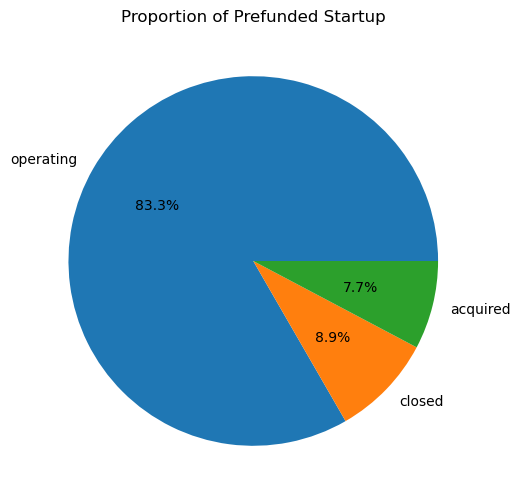

In [94]:
status_count= prefunded_startup_df['status'].value_counts()

# Create a pie chart for the top 20 countries
plt.figure(figsize=(10, 6))
plt.pie(status_count, labels=status_count.index, autopct='%1.1f%%')
plt.title('Proportion of Prefunded Startup')
plt.show()

In [106]:
# Set display options
pd.set_option('display.max_rows', None)
value_counts = df8['country_code'].value_counts()
value_counts

USA    19116
GBR     1668
CAN      865
FRA      562
CHN      513
ISR      505
IND      502
DEU      478
ESP      356
IRL      211
SGP      197
AUS      194
SWE      192
ITA      181
NLD      175
KOR      171
JPN      158
CHL      157
BRA      152
RUS      150
FIN      140
CHE      134
ARG      111
DNK      108
BEL       96
HKG       82
TUR       75
AUT       62
NOR       61
POL       54
MEX       49
BGR       49
ARE       46
NZL       40
MYS       39
PRT       38
EST       35
CZE       30
UKR       29
ZAF       29
HUN       26
IDN       26
THA       25
GRC       25
COL       22
PHL       21
TWN       21
ROM       21
LTU       18
NGA       15
ISL       15
PER       15
EGY       14
LUX       14
JOR       13
KEN       13
SVN       11
PAK       11
SVK        8
CYP        8
LBN        8
SRB        8
LVA        7
UGA        7
CYM        7
BGD        7
DZA        7
VNM        6
URY        6
GHA        6
HRV        5
SAU        4
PAN        4
BWA        3
SLV        3
AZE        2
MAR        2

In [108]:
value_counts.columns = ['country_code', 'count']
value_counts

# Filter based on value counts less than 50
filtered_values = value_counts[value_counts['count'] < 50]

KeyError: 'count'

In [ ]:
filtered_values['count'].sum()

In [ ]:
# Create a new column with "country_code_n" values
df8['country_code_n'] = np.where(df8['country_code'].isin(filtered_values['country_code']), 'OTHERS', df8['country_code'])


In [18]:
df8.tail(10)

NameError: name 'df8' is not defined

In [ ]:
df9= df8.drop(['country_code'], axis= 1)

In [19]:
df9.head()

NameError: name 'df9' is not defined

In [ ]:
df9['country_code_n'].unique()

In [ ]:
# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the "country_code" column
df9['country_code_encoded'] = label_encoder.fit_transform(df9['country_code_n'])

In [ ]:
df9.head()

In [20]:
# Create a dictionary mapping original country codes to encoded labels
country_code_mapping = dict(zip(df9['country_code_n'], df9['country_code_encoded']))

NameError: name 'df9' is not defined

In [ ]:
# country_code_mapping

In [ ]:
# Save the mapping dictionary as a JSON file
with open('country_code_mapping.json', 'w') as file:
    json.dump(country_code_mapping, file)

In [ ]:
df9['market'].nunique()

In [ ]:
# Remove leading and trailing spaces in the "market" column
df9['market'] = df['market'].str.strip()

In [ ]:
df9['market'].value_counts()

In [21]:
# Calculate value counts
value_counts = df9['market'].value_counts(dropna=False).reset_index()
value_counts.columns = ['market', 'count']

# Filter based on value counts less than 50
filtered_values = value_counts[value_counts['count'] < 200]

NameError: name 'df9' is not defined

In [ ]:
# Create a new column with "country_code_n" values
df9['market_n'] = np.where(df9['market'].isin(filtered_values['market']), 'OTHERS', df9['market'])

In [ ]:
df9.head()

In [22]:
# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the "market" column
df9['market_encoded'] = label_encoder.fit_transform(df9['market_n'])

# Create a dictionary mapping original market to encoded labels
market_mapping = dict(zip(df9['market_n'], df9['market_encoded']))


# Save the mapping dictionary as a JSON file
with open('market_mapping.json', 'w') as file:
    json.dump(market_mapping, file)

NameError: name 'LabelEncoder' is not defined

In [ ]:
df9.head()

In [ ]:
df10= df9.drop(['market_n', 'country_code_n'], axis=1)
df10.head()

In [23]:
df11= df10.drop(['market'], axis=1)

NameError: name 'df10' is not defined

In [ ]:
# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the "status" column
df11['status_encoded'] = label_encoder.fit_transform(df11['status'])

# Create a dictionary mapping original market to encoded labels
status_mapping = dict(zip(df11['status'], df11['status_encoded']))


# Save the mapping dictionary as a JSON file
with open('status_mapping.json', 'w') as file:
    json.dump(status_mapping, file)


In [24]:
df11.head()

NameError: name 'df11' is not defined

In [ ]:
df12= df11.drop(['status', 'first_funding_at', 'last_funding_at'], axis=1)

In [25]:
df12.head(10)

NameError: name 'df12' is not defined

In [ ]:
df13= df12.drop(['founded_at'], axis=1)

In [ ]:
df13.head()

In [ ]:
df13.columns

In [26]:
df14= df13.drop(['round_A', 'round_B', 'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H'], axis=1)

NameError: name 'df13' is not defined

In [ ]:
df14.head()

# Scaling :

In [ ]:
# Separate the columns for standardization
columns_to_standardize = ['total_investment', 'years_to_first_funding']
features = df14[columns_to_standardize]
other_features = df14.drop(columns_to_standardize, axis=1)

# Create an instance of StandardScaler
scaler = StandardScaler()

# Standardize the selected columns
features_standardized = scaler.fit_transform(features)

# Create a new dataframe with the standardized columns and other features
df_standardized = pd.DataFrame(features_standardized, columns=columns_to_standardize)
df_standardized = pd.concat([df_standardized, other_features], axis=1)


In [ ]:
df_standardized.head(10)

In [27]:
df_standardized['status_encoded'].unique()

NameError: name 'df_standardized' is not defined

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report

# Load your dataset
# Assuming you have your dataset loaded into a DataFrame called "df"

# Split the data into features (X) and target variable (y)
X = df14.drop('status_encoded', axis=1)  # Adjust the column name according to your dataset
y = df14['status_encoded']  # Adjust the column name according to your dataset

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')

# Define the hyperparameters grid for tuning
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'max_iter': [100, 200, 300]
}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train.values, y_train.values)

# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
classification_rep = classification_report(y_test, y_pred)

# Print the best hyperparameters and the classification report
print("Best Hyperparameters:", best_params)
print("Classification Report:")
print(classification_rep)

NameError: name 'df14' is not defined

In [ ]:
from sklearn.linear_model import LogisticRegression

# Split the data into features (X) and target variable (y)
X = df14.drop('status_encoded', axis=1)  # Adjust the column name according to your dataset
y = df14['status_encoded']  # Adjust the column name according to your dataset

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create a logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

y_true= model.predict(X_train)

In [ ]:
y_true

In [ ]:
from sklearn.metrics import confusion_matrix

# Assuming you have the true labels (y_true) and predicted labels (y_pred) for the test set
# Modify the variable names accordingly

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Create a list of class labels
classes = ['Class 0', 'Class 1', 'Class 2']

# Plot the confusion matrix using seaborn and matplotlib
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=classes, yticklabels=classes)

# Set plot labels
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [ ]:
##Which market is more likely to fail????

closed_df = df[df['status'] == 'closed']

# Get the top 20 closed markets
top_20_markets = closed_df['market'].value_counts().head(50)

# Plot the top 50 closed markets
plt.figure(figsize=(12, 6))
top_20_markets.plot(kind='bar')
plt.xlabel('Market')
plt.ylabel('Count')
plt.title('Top 50 Markets for Closed Startups')
plt.show()

In [ ]:
# Filter the DataFrame for rows where the status is "operating"
operating_df = df[df['status'] == 'operating']

# Get the top 50 operating markets
top_20_markets = operating_df['market'].value_counts().head(50)

# Plot the top 50 operating markets
plt.figure(figsize=(12, 6))
top_20_markets.plot(kind='bar')
plt.xlabel('Market')
plt.ylabel('Count')
plt.title('Top 50 Markets for Operating Startups')
plt.show()

#### Sampled dataset with same proportion as in original dataset

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

# Impute missing values in "status" column with mode
df['status'].fillna(df['status'].mode()[0], inplace=True)

# Split the dataset into features (X) and target variable (y)
X = df.iloc[:, :-1]
y = df["status"]

# Define the number of datapoints to sample
n_samples = 6000

# Define the StratifiedShuffleSplit object with the specified number of samples
sss = StratifiedShuffleSplit(n_splits=1, train_size=n_samples, random_state=42)

# Use the object to split the dataset into train and test sets
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# Combine the sampled data into a new dataframe
sampled_df = pd.concat([X_train, y_train], axis=1)

#find the duplicate columns keeping the last one
sampled_df.index.duplicated()
sampled_df = sampled_df.loc[:,~sampled_df.T.duplicated(keep='last')]

# Verify that the categories are equally represented in the sampled dataset
print(sampled_df["status"].value_counts())
sampled_df.columns



In [ ]:
counts = df['status'].value_counts()
percentages = counts / len(df) * 100
print(percentages)

In [ ]:
sampled_df.shape

#### Sampled dataset with equal no.of values for target variable

In [ ]:
import pandas as pd

original_df= pd.read_csv('investments_VC.csv',encoding='ISO-8859-1')

# Create three separate dataframes based on the status category
df1 = original_df[original_df["status"] == "acquired"]
df2 = original_df[original_df["status"] == "operating"]
df3 = original_df[original_df["status"] == "closed"]

# Set the number of samples to collect from each dataframe
n_samples = 2000

# Collect the desired number of samples from each dataframe
df1_sampled = df1.sample(n=n_samples, random_state=42)
df2_sampled = df2.sample(n=n_samples, random_state=42)
df3_sampled = df3.sample(n=n_samples, random_state=42)

# Merge the sampled dataframes into a single dataframe
sampled_df = pd.concat([df1_sampled, df2_sampled, df3_sampled])

# Reset the index of the merged dataframe
sampled_df = sampled_df.reset_index(drop=True)

# Verify that the categories are proportionally represented in the sampled dataset
print(sampled_df["status"].value_counts(normalize=True))


In [ ]:
sampled_df['status'].value_counts()

In [ ]:
print(f'Categorical Features:   {len([_d for _d in sampled_df.columns if sampled_df[_d].dtype == object])}')
print(f'Numerical Features: {len([_d for _d in sampled_df.columns if sampled_df[_d].dtype == int])}')

In [ ]:
sampled_df.describe(include=[np.number])

In [ ]:
sampled_df[' market '].value_counts()

In [ ]:
## For string/Object type (Categorical) columns only
sampled_df.describe(include=['O'])

In [ ]:
nominal_features = ['country_code','state_code','region','city',"round_A","round_B","round_C","round_D","round_E","round_F","round_G"]


In [ ]:
sampled_df[nominal_features]


In [ ]:
#Encoding
from sklearn.preprocessing import LabelEncoder

#dummy variable encoding
sampled_df_encoded_nominal=pd.get_dummies(sampled_df,columns=nominal_features, prefix=nominal_features)

In [ ]:
sampled_df_encoded_nominal

In [ ]:
sampled_df['homepage_url'].isna().sum()

In [ ]:
# Replace null values in 'permalink' column with 0, non-null values with 1
sampled_df['has_website'] = sampled_df['homepage_url'].notnull().astype(int)

In [ ]:
sampled_df

In [ ]:
sampled_df.drop(['permalink','homepage_url'],axis=1,inplace=True)

In [ ]:
sampled_df